### Видеокурс по теории вероятностей и математической статистике

In [22]:
from math import sqrt
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

#### Homework 5

*В поле ответа впишите одно число. Нецелые числа следует округлить до 8 знаков после запятой.*

**Задача 1**  
Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16.  
Найти ширину доверительного интервала для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.

**Решение:**

Выборочное среднее равно

In [2]:
M = 80

Среднее квадратическое отклонение

In [3]:
sigma = 16

Объем выборки 

In [4]:
n = 256

Альфа

In [5]:
alpha = 1 - 0.95

In [6]:
Z_half_alpha = 1.96

Ширина доверительного интервала

In [7]:
left_interval = M - Z_half_alpha * sigma / sqrt(n)
left_interval

78.04

In [8]:
right_interval = M + Z_half_alpha * sigma / sqrt(n)
right_interval

81.96

In [12]:
print(f'Доверительный интервал: ({left_interval}; {right_interval})')

Доверительный интервал: (78.04; 81.96)


**Задача 2**  
Продавец утверждает, что средний вес пачки печенья составляет 200 г.  
Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально.  
Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.

**Решение:**

In [13]:
cookies = [202, 203, 199, 197, 195, 201, 200, 204, 194, 190]
cookies.sort()

Выборочное среднее равно

In [15]:
mean_cookies = sum(cookies)/len(cookies)
mean_cookies

198.5

Объем выборки

In [16]:
len(cookies)

10

Среднее квадратическое отклонение

In [17]:
sigma_cookies = sqrt(sum((x - mean_cookies)**2 for x in cookies) / (len(cookies) - 1))
sigma_cookies

4.453463071962462

Пусть  
Н_0: М = 200,  
Н_1: М != 200

Тогда

In [18]:
t_cookies = (mean_cookies - 200) / sigma_cookies * sqrt(len(cookies))
t_cookies

-1.0651074037450896

По  таблице  критических  точек  распределения  Стьюдента  найдем  критическую  точку по уровню значимости α = 0,01 и числу степеней свободы n = 9, откуда t_kr = 3,25

In [19]:
t_kr = 3.25

In [20]:
abs(t_cookies) < t_kr

True

Так как   
abs(t _cookies) < t_kr,  
то  нулевая  гипотеза  верна

**Задача 3**  
Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`.  

Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.

**Решение:**

Условие

In [23]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])
n = samples.shape[0]
var = 0.0625
sample_var = samples.var(ddof=1)

Выбор статистики

In [24]:
def h_statistic(n: float, sample_variance: float, variance: float) -> float:
    return ((n - 1) * sample_variance / variance)

Уровень значимости 

In [25]:
alpha = 0.05

Критическая область

In [26]:
df_ = n - 1
t1 = stats.chi2.ppf(alpha/2, df = df_)
t2 = stats.chi2.ppf((1-alpha/2), df=df_)

np.round(t1, 3), np.round(t2, 3)

(11.689, 38.076)

Визуализация

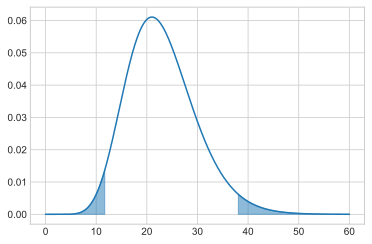

In [27]:
ox = np.linspace(0, 60, 1000)
oy = stats.chi2.pdf(ox, df = df_)

ox_left = np.linspace(0, t1, 200)
oy_left = stats.chi2.pdf(ox_left, df=df_)

ox_right = np.linspace(t2, 60, 200)
oy_right = stats.chi2.pdf(ox_right, df=df_)

plt.plot(ox,oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.show()

Статистический тест

In [28]:
S = h_statistic(n, sample_var, var)
S

28.720541753333343

Найденное значение не попало в критическую область.  
Нулевая гипотеза остаётся в силе.

In [30]:
print(f'Ответ: 1')

Ответ: 1
